In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [61]:
df = pd.read_csv('HAM10000_metadata.csv')
clean_df = df.dropna(axis = 'rows')
clean_df = clean_df.loc[clean_df['sex'] != 'unknown']
clean_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [62]:
grouped = clean_df.groupby('localization').count()[['dx']].sort_values(by=['dx'], ascending=False)
grouped

,dx
localization,
back,2190
lower extremity,2077
trunk,1400
upper extremity,1116
abdomen,1019
face,743
chest,405
foot,314
unknown,187


<AxesSubplot:xlabel='localization'>

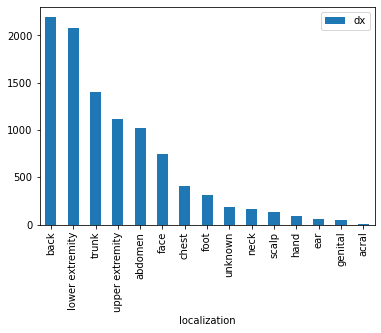

In [63]:
grouped.plot(kind='bar')



In [64]:
bins = [0, 39.9 ,49.9, 59.9, 69.9, 79.9, 80]
group_names = ['Under Forty', 'Forties', 'Fifties', 'Sixties', 'Seventies', 'Over 80']

clean_df2 = clean_df
clean_df2['Age Groups'] = pd.cut(clean_df2['age'], bins, labels=group_names, include_lowest=True)
print(clean_df2)

         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

      Age Groups  
0        Over 80  
1        Over 80  
2     

In [65]:
grouped_age = clean_df2.groupby(['Age Groups']).count()[['dx']]
grouped_age

,dx
Age Groups,
Under Forty,1871
Forties,2282
Fifties,2196
Sixties,1531
Seventies,1374
Over 80,404


<AxesSubplot:xlabel='Age Groups'>

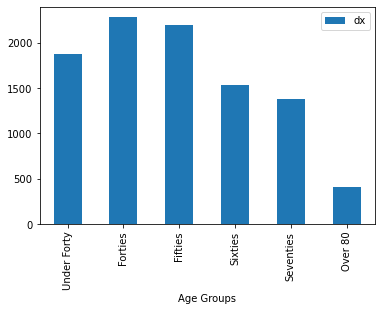

In [66]:
grouped_age.plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

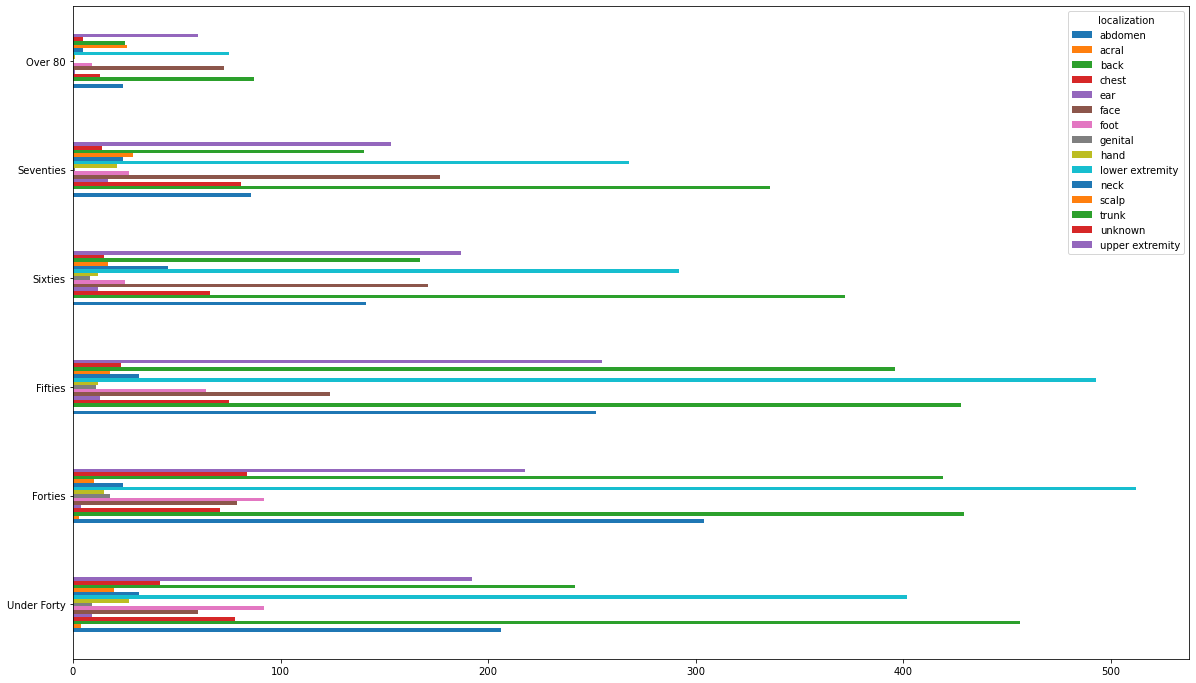

In [69]:
clean_df2.groupby('localization')["Age Groups"].value_counts().unstack(0).plot.barh(figsize=(20,12))
plt.show

In [68]:
plt.title('Localization vs. Age')
plt.xlabel('Age')
plt.ylabel('Localization')

bins = [0, 39.9 ,49.9, 59.9, 69.9, 79.9, 89.9, 100]
group_names = ['Under Forty', 'Forties', 'Fifties', 'Sixties', 'Seventies', 'Eighties', 'Over 90']

clean_df2 = clean_df
clean_df2['Age Groups'] = pd.cut(clean_df2['age'], bins, labels=group_names, include_lowest=True)
# print(clean_df2)

age = clean_df['age']
localization = clean_df['localization']
age_groups = clean_df2['Age Groups']

x = localization
y = age

plt.xticks(rotation=45)

# plt.scatter(x, y)
# plt.show()

# Now plot each zone on a particular axis
for i, zone in enumerate(zones):
    clean_df2.loc[clean_df2.localization==localization].hist(column='Localization',
                                   bins,labels=group_names
                                   ax=axes[i],
                                   sharey=True)
    axes[i].set_title('Localization vs. Age {0}'.format(localization))
    axes[i].set_xlabel('Localization')
    axes[i].set_ylabel('Age')


plt.bar(localization, 'Forties', .5)
plt.bar(localization, 'Fifties', .5, bottom='Forties')
plt.bar


# print(x1)
# print(y1)

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_52560/108715110.py, line 28)